In [2]:
%pip install findspark

In [3]:
import findspark
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = spark.read.csv('/content/drive/MyDrive/Datasets/loan.csv', inferSchema = True, header = True)

In [5]:
df.printSchema()

root
 |-- Customer_ID: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Marital Status: string (nullable = true)
 |-- Family Size: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Expenditure: integer (nullable = true)
 |-- Use Frequency: integer (nullable = true)
 |-- Loan Category: string (nullable = true)
 |-- Loan Amount: string (nullable = true)
 |-- Overdue: integer (nullable = true)
 |--  Debt Record: string (nullable = true)
 |--  Returned Cheque: integer (nullable = true)
 |--  Dishonour of Bill: integer (nullable = true)



In [6]:
df.show(5)


+-----------+---+------+------------+--------------+-----------+------+-----------+-------------+-------------+-----------+-------+------------+----------------+------------------+
|Customer_ID|Age|Gender|  Occupation|Marital Status|Family Size|Income|Expenditure|Use Frequency|Loan Category|Loan Amount|Overdue| Debt Record| Returned Cheque| Dishonour of Bill|
+-----------+---+------+------------+--------------+-----------+------+-----------+-------------+-------------+-----------+-------+------------+----------------+------------------+
|    IB14001| 30|  MALE|BANK MANAGER|        SINGLE|          4| 50000|      22199|            6|      HOUSING| 10,00,000 |      5|      42,898|               6|                 9|
|    IB14008| 44|  MALE|   PROFESSOR|       MARRIED|          6| 51000|      19999|            4|     SHOPPING|     50,000|      3|      33,999|               1|                 5|
|    IB14012| 30|FEMALE|     DENTIST|        SINGLE|          3| 58450|      27675|            

In [7]:
len(df.columns)

15

In [8]:
df.count()

500

In [9]:
df.distinct().count()

500

In [10]:
df.groupBy("Loan Category").count().orderBy("count", ascending = False).show()

+------------------+-----+
|     Loan Category|count|
+------------------+-----+
|         GOLD LOAN|   77|
|           HOUSING|   67|
|        AUTOMOBILE|   60|
|        TRAVELLING|   53|
|       RESTAURANTS|   41|
|COMPUTER SOFTWARES|   35|
|          SHOPPING|   35|
|          BUSINESS|   24|
|  EDUCATIONAL LOAN|   20|
|        RESTAURANT|   20|
|           DINNING|   14|
|       ELECTRONICS|   14|
|   HOME APPLIANCES|   14|
|       AGRICULTURE|   12|
|       BOOK STORES|    7|
|          BUILDING|    7|
+------------------+-----+



In [11]:
df.filter(df["Loan Amount"]>"1,00,000").count()

379

In [12]:
#number of people with income greater than 60000 rupees
df.filter(df["Income"]>"60000").count()

198

In [13]:
#number of people with 2 or more returned cheques and income less than 50000
df.filter((df[" Returned Cheque"]>"1") & (df["Income"]<"50000")).count()

137

In [14]:
#number of people with 2 or more returned cheques and are single
df.filter((df[" Returned Cheque"]>"1") & (df["Marital Status"]<"SINGLE")).count()

283

In [15]:
#number of people with expenditure over 50000 a month
df.filter((df["Expenditure"]>"50000")).show()

+-----------+---+------+---------------+--------------+-----------+------+-----------+-------------+-------------+-----------+-------+------------+----------------+------------------+
|Customer_ID|Age|Gender|     Occupation|Marital Status|Family Size|Income|Expenditure|Use Frequency|Loan Category|Loan Amount|Overdue| Debt Record| Returned Cheque| Dishonour of Bill|
+-----------+---+------+---------------+--------------+-----------+------+-----------+-------------+-------------+-----------+-------+------------+----------------+------------------+
|    IB14158| 54|  MALE|AIRPORT OFFICER|       MARRIED|          6| 80000|      62541|            2|   AUTOMOBILE| 20,45,789 |      1|      16,599|               2|                 3|
|    IB14176| 54|  MALE|AIRPORT OFFICER|       MARRIED|          6| 80000|      62541|            2|      HOUSING| 20,45,789 |      1|      16,599|               2|                 3|
|    IB14204| 54|  MALE|AIRPORT OFFICER|       MARRIED|          6| 81000|      

# CREDIT CARD DATASET

In [16]:
dfc = spark.read.csv('/content/drive/MyDrive/Datasets/credit card.csv', inferSchema = True, header = True)

In [17]:
dfc.printSchema()

root
 |-- RowNumber: integer (nullable = true)
 |-- CustomerId: integer (nullable = true)
 |-- Surname: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Geography: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Balance: double (nullable = true)
 |-- NumOfProducts: integer (nullable = true)
 |-- IsActiveMember: integer (nullable = true)
 |-- EstimatedSalary: double (nullable = true)
 |-- Exited: integer (nullable = true)



In [18]:
print("Total Columns : ", len(dfc.columns))
print("Total Count : ", dfc.count())
print("Total Distinct Count : ",dfc.distinct().count())

dfc.show(5)

Total Columns :  13
Total Count :  10000
Total Distinct Count :  10000
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|      0.0|            1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|             1|      112542.58|     0|
|        3|  15619304|    Onio|        502|   France|Female| 42|     8| 159660.8|            3|             0|      113931.57|     1|
|        4|  15701354|    Boni|        699|   France|Female| 39|     1|      0.0|            2|             0|       93826.63

In [19]:
#number of members who are elgible for credit card
dfc.filter(dfc["CreditScore"]>700).count()

3116

In [20]:
#number of members who are  elgible and active in the bank
dfc.filter((dfc["IsActiveMember"]==1) & (dfc["CreditScore"]>700)).count()

1637

In [21]:
#credit card users in Spain
dfc.filter(dfc["Geography"]=="Spain").show()

+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|RowNumber|CustomerId|  Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|        2|  15647311|     Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|             1|      112542.58|     0|
|        5|  15737888| Mitchell|        850|    Spain|Female| 43|     2|125510.82|            1|             1|        79084.1|     0|
|        6|  15574012|      Chu|        645|    Spain|  Male| 44|     8|113755.78|            2|             0|      149756.71|     1|
|       12|  15737173|  Andrews|        497|    Spain|  Male| 24|     3|      0.0|            2|             0|       76390.01|     0|
|       15|  15600882|    Scott|        635|    Spain|F

In [22]:
dfc.filter((dfc["EstimatedSalary"]>100000) & (dfc["Exited"]==1)).count()

1044

In [23]:
dfc.filter((dfc["EstimatedSalary"]<100000) & (dfc["NumOfProducts"]>1)).count()

2432

# TRANSACTION DATASET

In [24]:
txn = spark.read.csv('/content/drive/MyDrive/Datasets/txn.csv', inferSchema=True, header =True)

In [25]:
txn.printSchema()

root
 |-- Account No: string (nullable = true)
 |-- TRANSACTION DETAILS: string (nullable = true)
 |-- VALUE DATE: string (nullable = true)
 |--  WITHDRAWAL AMT : double (nullable = true)
 |--  DEPOSIT AMT : double (nullable = true)
 |-- BALANCE AMT: double (nullable = true)



In [26]:
#COUNT OF TRANSACTION ON EVERY ACCOUNT
txn.groupBy("Account No").count().show()

+-------------+-----+
|   Account No|count|
+-------------+-----+
|409000438611'| 4588|
|     1196711'|10536|
|     1196428'|48779|
|409000493210'| 6014|
|409000611074'| 1093|
|409000425051'|  802|
|409000405747'|   51|
|409000362497'|29840|
|409000493201'| 1044|
|409000438620'|13454|
+-------------+-----+



In [27]:
#Maximum withdrawal amount
txn.groupBy("Account No").max(" WITHDRAWAL AMT ").orderBy("max( WITHDRAWAL AMT )", ascending = False).show()

+-------------+---------------------+
|   Account No|max( WITHDRAWAL AMT )|
+-------------+---------------------+
|     1196711'|        4.594475464E8|
|409000438620'|                4.0E8|
|409000425051'|               3.54E8|
|409000438611'|                2.4E8|
|409000405747'|                1.7E8|
|     1196428'|                1.5E8|
|409000362497'|        1.413662392E8|
|409000493210'|                1.5E7|
|409000493201'|            2500000.0|
|409000611074'|             912000.0|
+-------------+---------------------+



In [28]:
#MINIMUM WITHDRAWAL AMOUNT OF AN ACCOUNT
txn.groupBy("Account No").min(" WITHDRAWAL AMT ").orderBy("min( WITHDRAWAL AMT )").show()

+-------------+---------------------+
|   Account No|min( WITHDRAWAL AMT )|
+-------------+---------------------+
|409000493210'|                 0.01|
|409000438611'|                  0.2|
|     1196711'|                 0.25|
|     1196428'|                 0.25|
|409000438620'|                 0.34|
|409000362497'|                 0.97|
|409000425051'|                 1.25|
|409000493201'|                  2.1|
|409000405747'|                 21.0|
|409000611074'|                120.0|
+-------------+---------------------+



In [29]:
#MAXIMUM DEPOSIT AMOUNT OF AN ACCOUNT
txn.groupBy("Account No").max(" DEPOSIT AMT ").orderBy("max( DEPOSIT AMT )", ascending = False).show()

+-------------+------------------+
|   Account No|max( DEPOSIT AMT )|
+-------------+------------------+
|409000438620'|           5.448E8|
|     1196711'|             5.0E8|
|     1196428'|     2.119594422E8|
|409000405747'|           2.021E8|
|409000362497'|             2.0E8|
|409000438611'|          1.7025E8|
|409000493210'|             1.5E7|
|409000425051'|             1.5E7|
|409000611074'|         3000000.0|
|409000493201'|         1000000.0|
+-------------+------------------+



In [30]:
#MINIMUM DEPOSIT AMOUNT OF AN ACCOUNT
txn.groupBy("Account No").min(" DEPOSIT AMT ").orderBy("min( DEPOSIT AMT )").show()

+-------------+------------------+
|   Account No|min( DEPOSIT AMT )|
+-------------+------------------+
|409000493210'|              0.01|
|409000438611'|              0.03|
|409000362497'|              0.03|
|409000438620'|              0.07|
|409000493201'|               0.9|
|     1196428'|               1.0|
|409000425051'|               1.0|
|     1196711'|              1.01|
|409000405747'|             500.0|
|409000611074'|            1320.0|
+-------------+------------------+



In [31]:
#sum of balance in every bank account
txn.groupBy("Account No").sum("BALANCE AMT").show()

+-------------+--------------------+
|   Account No|    sum(BALANCE AMT)|
+-------------+--------------------+
|409000438611'|-2.49486577068339...|
|     1196711'|-1.60476498101275E13|
|     1196428'| -8.1418498130721E13|
|409000493210'|-3.27584952132095...|
|409000611074'|       1.615533622E9|
|409000425051'|-3.77211841164998...|
|409000405747'|-2.43108047067000...|
|409000362497'| -5.2860004792808E13|
|409000493201'|1.0420831829499985E9|
|409000438620'|-7.12291867951358...|
+-------------+--------------------+



In [32]:
#Number of transaction on each date
txn.groupBy("VALUE DATE").count().orderBy("count", ascending = False).show()

+----------+-----+
|VALUE DATE|count|
+----------+-----+
| 27-Jul-17|  567|
| 13-Aug-18|  463|
|  8-Nov-17|  402|
|  7-Oct-17|  382|
| 10-Jul-18|  374|
| 12-Dec-17|  367|
| 12-Sep-18|  365|
|  9-Aug-18|  360|
| 19-Sep-17|  358|
| 16-Mar-17|  353|
| 10-Sep-18|  344|
| 14-Jul-17|  333|
|  7-Mar-18|  319|
| 11-Oct-18|  303|
| 22-Aug-17|  301|
|  9-Jan-18|  299|
|  9-Oct-18|  297|
| 20-Apr-18|  296|
|  9-Jul-18|  292|
|  7-Apr-18|  291|
+----------+-----+
only showing top 20 rows



In [33]:
#List of customers with withdrawal amount more than 1 lakh
txn.select("Account No","TRANSACTION DETAILS"," WITHDRAWAL AMT ").filter(txn[" WITHDRAWAL AMT "]>100000).show()

+-------------+--------------------+----------------+
|   Account No| TRANSACTION DETAILS| WITHDRAWAL AMT |
+-------------+--------------------+----------------+
|409000611074'|INDO GIBL Indiafo...|        133900.0|
|409000611074'|INDO GIBL Indiafo...|        195800.0|
|409000611074'|INDO GIBL Indiafo...|        143800.0|
|409000611074'|INDO GIBL Indiafo...|        331650.0|
|409000611074'|INDO GIBL Indiafo...|        129000.0|
|409000611074'|INDO GIBL Indiafo...|        230013.0|
|409000611074'|INDO GIBL Indiafo...|        367900.0|
|409000611074'|INDO GIBL Indiafo...|        108000.0|
|409000611074'|INDO GIBL Indiafo...|        141000.0|
|409000611074'|INDO GIBL Indiafo...|        206000.0|
|409000611074'|INDO GIBL Indiafo...|        242300.0|
|409000611074'|INDO GIBL Indiafo...|        113250.0|
|409000611074'|INDO GIBL Indiafo...|        206900.0|
|409000611074'|INDO GIBL Indiafo...|        276000.0|
|409000611074'|INDO GIBL Indiafo...|        171000.0|
|409000611074'|INDO GIBL Ind

# VISUALIZATION AND PLOTS

## Data Loading

In [ ]:

sns.set_style('whitegrid')
plt.rcParams.update({'figure.figsize': (8,4), 'axes.titlesize':13, 'axes.labelsize':11})

# Load data
cc = pd.read_csv('/content/drive/MyDrive/Datasets/credit card.csv', low_memory=False)
loan = pd.read_csv('/content/drive/MyDrive/Datasets/loan.csv', low_memory=False)
txn = pd.read_csv('/content/drive/MyDrive/Datasets/txn.csv', low_memory=False)

# Simple cleaning
cc.columns = [c.strip() for c in cc.columns]
loan.columns = [c.strip() for c in loan.columns]
txn.columns = [c.strip() for c in txn.columns]

# Ensure Exited is numeric
if 'Exited' in cc.columns:
    cc['Exited'] = pd.to_numeric(cc['Exited'], errors='coerce').fillna(0).astype(int)

# Normalize txn columns
for c in txn.columns:
    cl = c.upper()
    if 'WITHDRAW' in cl:
        txn.rename(columns={c:'withdrawal_amt'}, inplace=True)
    if 'DEPOSIT' in cl:
        txn.rename(columns={c:'deposit_amt'}, inplace=True)
    if 'BALANCE' in cl:
        txn.rename(columns={c:'balance_amt'}, inplace=True)
    if 'VALUE DATE' in cl or ('VALUE' in cl and 'DATE' in cl):
        txn.rename(columns={c:'value_date'}, inplace=True)

# Convert amounts to numeric
for col in ['deposit_amt','withdrawal_amt','balance_amt']:
    if col in txn.columns:
        txn[col] = pd.to_numeric(txn[col].astype(str).str.replace('[,\s₹$]', '', regex=True), errors='coerce')
    else:
        txn[col] = 0

# Create txn_amount
txn['deposit_amt_f'] = txn['deposit_amt'].fillna(0)
txn['withdrawal_amt_f'] = txn['withdrawal_amt'].fillna(0)
txn['txn_amount'] = txn['deposit_amt_f'] - txn['withdrawal_amt_f']


## Plot 1: Age histogram


Plot 1: Age distribution (histogram + KDE)
Explanation: Distribution of customer ages; KDE shows shape of distribution.


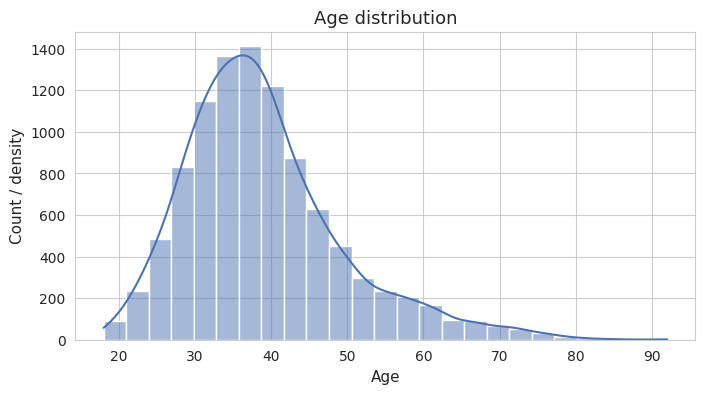

In [35]:

print('\nPlot 1: Age distribution (histogram + KDE)')
print('Explanation: Distribution of customer ages; KDE shows shape of distribution.')
if 'Age' in cc.columns:
    plt.figure()
    sns.histplot(cc['Age'].dropna(), bins=25, kde=True, color='#4c72b0')
    plt.title('Age distribution')
    plt.xlabel('Age')
    plt.ylabel('Count / density')
    plt.show()
else:
    print('Age column not found.')

## Plot 2: Churn pie chart


Plot 2: Churn proportion (pie chart)
Explanation: Share of customers who exited vs stayed (class balance).


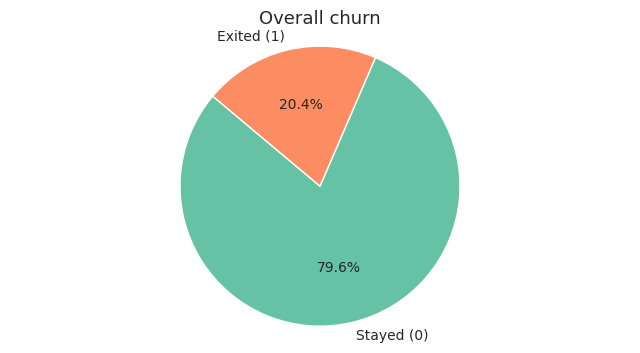

In [36]:

print('\nPlot 2: Churn proportion (pie chart)')
print('Explanation: Share of customers who exited vs stayed (class balance).')
if 'Exited' in cc.columns:
    counts = cc['Exited'].value_counts().sort_index()
    labels = ['Stayed (0)','Exited (1)'] if len(counts)==2 else counts.index.astype(str)
    colors = ['#66c2a5', '#fc8d62']
    plt.figure()
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('Overall churn')
    plt.axis('equal')
    plt.show()
else:
    print('Exited not found.')

## Plot 3: Churn rate by Geography (bar)


Plot 3: Churn rate by Geography
Explanation: Compare churn fractions across geographies.


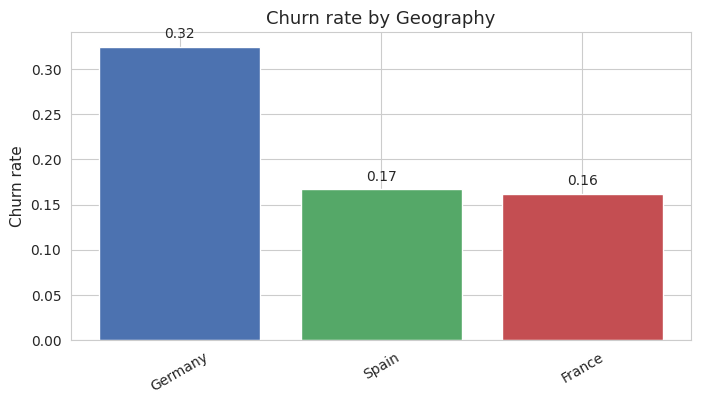

In [37]:

print('\nPlot 3: Churn rate by Geography')
print('Explanation: Compare churn fractions across geographies.')
if {'Geography','Exited'}.issubset(cc.columns):
    geo = cc.groupby('Geography')['Exited'].mean().sort_values(ascending=False)
    plt.figure()
    plt.bar(geo.index, geo.values, color=['#4c72b0','#55a868','#c44e52'])
    plt.title('Churn rate by Geography')
    plt.ylabel('Churn rate')
    plt.xticks(rotation=30)
    for i,v in enumerate(geo.values):
        plt.text(i, v+0.01, f'{v:.2f}', ha='center')
    plt.show()
else:
    print('Geography or Exited missing.')

## Plot 4: Balance by churn (boxplot)

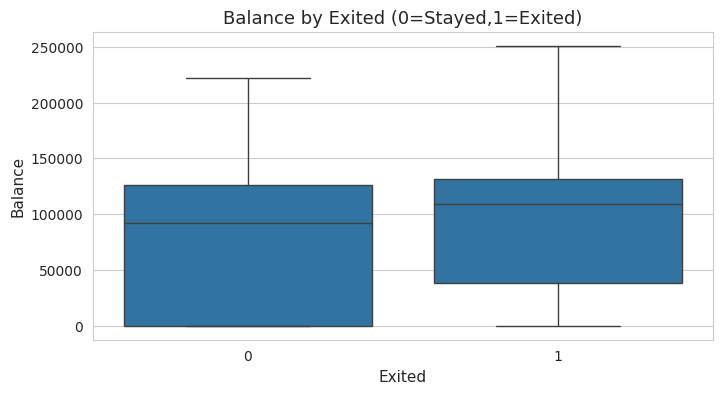

In [38]:

if {'Balance','Exited'}.issubset(cc.columns):
  plt.figure()
  sns.boxplot(x='Exited', y='Balance', data=cc)
  plt.title('Balance by Exited (0=Stayed,1=Exited)')
  plt.xlabel('Exited')
  plt.ylabel('Balance')
  plt.show()
else:
  print('Balance or Exited column missing.')

## Plot 5: Loan Amount histogram

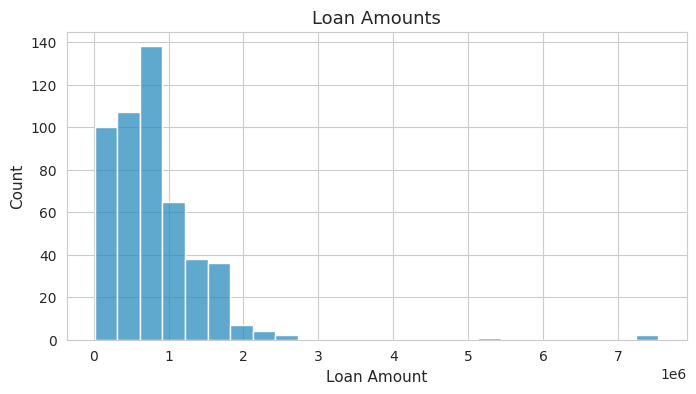

In [39]:

if 'Loan Amount' in loan.columns:
  loan_amt_raw = loan['Loan Amount'].astype(str).str.replace(r'[\s,₹$]', '', regex=True)
  loan_amt = pd.to_numeric(loan_amt_raw, errors='coerce')
  plt.figure()
  sns.histplot(loan_amt.dropna(), bins=25, kde=False, color='#2b8cbe')
  plt.title('Loan Amounts')
  plt.xlabel('Loan Amount')
  plt.ylabel('Count')
  plt.show()
else:
  print('Loan Amount not found in loan data.')

## Plot 6: Loan default pie (simple derived)



Plot 6: Derived loan default rate (pie)
Explanation: Simple rule-based default flag. Validate before using.


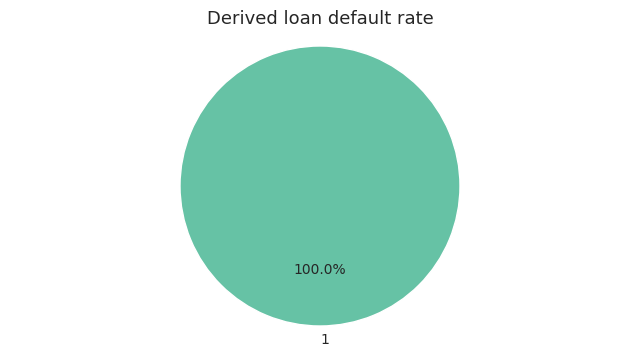

In [40]:

print('\nPlot 6: Derived loan default rate (pie)')
print('Explanation: Simple rule-based default flag. Validate before using.')
cols_present = any(c in loan.columns for c in ['Overdue','Returned Cheque','Dishonour of Bill','Dishonour'])
if cols_present:
    overdue = pd.to_numeric(loan.get('Overdue', 0), errors='coerce').fillna(0)
    ret = pd.to_numeric(loan.get('Returned Cheque', loan.get(' Returned Cheque', 0)), errors='coerce').fillna(0)
    dish = pd.to_numeric(loan.get('Dishonour of Bill', loan.get(' Dishonour of Bill', loan.get('Dishonour', 0))), errors='coerce').fillna(0)
    default_flag = ((overdue>0) | (ret>0) | (dish>0)).astype(int)
    counts = default_flag.value_counts().sort_index()
    labels = ['Non-default','Default'] if len(counts)==2 else counts.index.astype(str)
    plt.figure()
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66c2a5','#fc8d62'])
    plt.title('Derived loan default rate')
    plt.axis('equal')
    plt.show()
else:
    print('No overdue/returned/dishonour columns found.')

## Plot 7: Transaction absolute amount histogram


Plot 7: Transaction absolute amount distribution
Explanation: Magnitude of transactions; log scale helps visualize heavy tails.


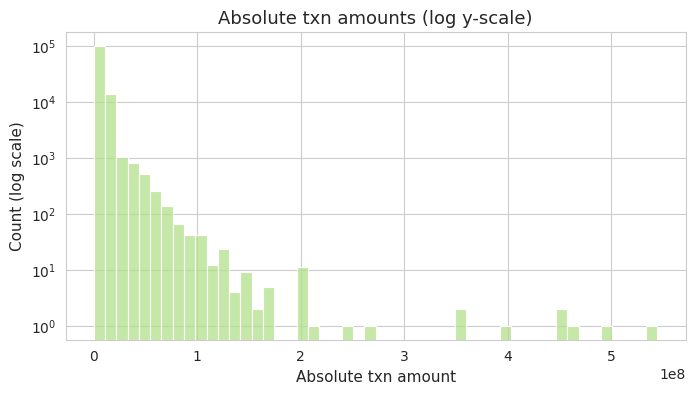

In [41]:

print('\nPlot 7: Transaction absolute amount distribution')
print('Explanation: Magnitude of transactions; log scale helps visualize heavy tails.')
if 'txn_amount' in txn.columns:
    vals = txn['txn_amount'].abs().dropna()
    if len(vals)>0:
        plt.figure()
        sns.histplot(vals[vals>0], bins=50, kde=False, color='#b2df8a')
        plt.yscale('log')
        plt.title('Absolute txn amounts (log y-scale)')
        plt.xlabel('Absolute txn amount')
        plt.ylabel('Count (log scale)')
        plt.show()
    else:
        print('No txn amounts available.')
else:
    print('txn_amount not found.')


## Plot 8: Top 10 accounts by transaction count


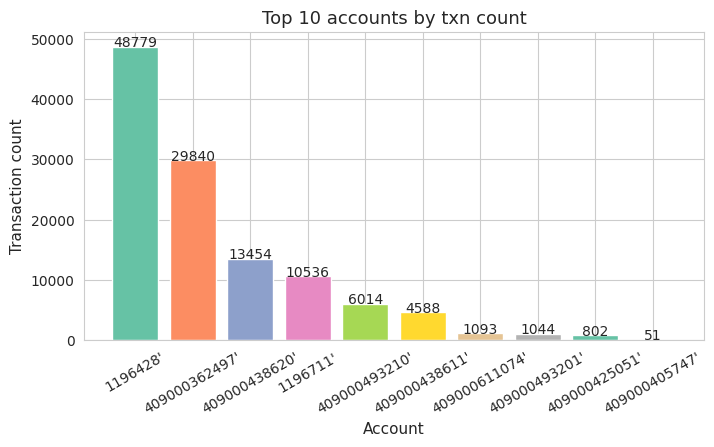

In [42]:

acct_col = None
for c in ['Account No','account_no','AccountNo']:
    if c in txn.columns:
        acct_col = c
        break
if acct_col:
    top = txn[acct_col].value_counts().head(10)
    plt.figure()
    colors = sns.color_palette('Set2', n_colors=len(top))
    plt.bar(top.index.astype(str), top.values, color=colors)
    plt.title('Top 10 accounts by txn count')
    plt.xlabel('Account')
    plt.ylabel('Transaction count')
    plt.xticks(rotation=30)
    for i,v in enumerate(top.values):
        plt.text(i, v+0.5, str(v), ha='center')
    plt.show()
else:
    print('Account column not found in txn data.')
